In [1]:
!pip install pandas

import pandas as pd
df=pd.read_csv("80_Train.csv",sep=",")



In [2]:
x_columns=df.columns
x = df[x_columns].values
y = df['RF'].values

In [3]:
conda install tensorflow


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install keras

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
 conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
out_of_sample_y = []
out_of_sample_pred = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)
    model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)
    
    pred = model.predict(x_test)
    
    out_of_sample_y.append(y_test)
    out_of_sample_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_absolute_error(pred,y_test))
    print(f"Fold score (MAE): {score}")
# Build the oos prediction list and calculate the error.
out_of_sample_y = np.concatenate(out_of_sample_y)
out_of_sample_pred = np.concatenate(out_of_sample_pred)




score = np.sqrt(metrics.mean_absolute_error(out_of_sample_pred,out_of_sample_y))
print(f"Final, out of sample score (RMSE): {score}")
    


Fold #1
Epoch 1/1000
2/2 - 1s - loss: 0.7973 - val_loss: 0.7286
Epoch 2/1000
2/2 - 0s - loss: 0.7475 - val_loss: 0.6828
Epoch 3/1000
2/2 - 0s - loss: 0.7027 - val_loss: 0.6424
Epoch 4/1000
2/2 - 0s - loss: 0.6624 - val_loss: 0.6070
Epoch 5/1000
2/2 - 0s - loss: 0.6258 - val_loss: 0.5771
Epoch 6/1000
2/2 - 0s - loss: 0.5937 - val_loss: 0.5484
Epoch 7/1000
2/2 - 0s - loss: 0.5624 - val_loss: 0.5209
Epoch 8/1000
2/2 - 0s - loss: 0.5318 - val_loss: 0.4944
Epoch 9/1000
2/2 - 1s - loss: 0.5039 - val_loss: 0.4704
Epoch 10/1000
2/2 - 0s - loss: 0.4775 - val_loss: 0.4512
Epoch 11/1000
2/2 - 0s - loss: 0.4518 - val_loss: 0.4312
Epoch 12/1000
2/2 - 0s - loss: 0.4282 - val_loss: 0.4106
Epoch 13/1000
2/2 - 0s - loss: 0.4089 - val_loss: 0.3929
Epoch 14/1000
2/2 - 0s - loss: 0.3962 - val_loss: 0.3783
Epoch 15/1000
2/2 - 0s - loss: 0.3868 - val_loss: 0.3670
Epoch 16/1000
2/2 - 0s - loss: 0.3791 - val_loss: 0.3559
Epoch 17/1000
2/2 - 0s - loss: 0.3702 - val_loss: 0.3444
Epoch 18/1000
2/2 - 0s - loss: 0

In [16]:
print(out_of_sample_pred)

[array([[0.51348066],
       [0.39987934],
       [0.44722474],
       [0.43654448],
       [0.870128  ],
       [0.33662358],
       [0.5893666 ],
       [0.3617073 ],
       [0.2659033 ],
       [0.8925205 ],
       [0.3248547 ],
       [0.5884473 ]], dtype=float32), array([[0.29858184],
       [0.6754683 ],
       [0.21041906],
       [0.3844298 ],
       [0.94236165],
       [0.33010542],
       [0.8600153 ],
       [0.42287344],
       [0.2027397 ],
       [0.20280221],
       [0.7660517 ],
       [0.47555745]], dtype=float32), array([[0.80087316],
       [0.5053216 ],
       [0.92779964],
       [0.9600152 ],
       [0.33259195],
       [0.154367  ],
       [0.23144726],
       [0.302872  ],
       [0.24541304],
       [0.6314484 ],
       [0.8212741 ],
       [0.39526597]], dtype=float32), array([[0.45515004],
       [0.44293335],
       [0.31055436],
       [0.3582977 ],
       [0.35195088],
       [0.3404508 ],
       [0.606754  ],
       [0.30718252],
       [0.65045017],
   

In [17]:
print(out_of_sample_y)

[array([0.55050505, 0.31313131, 0.56060606, 0.23737374, 0.75757576,
       0.        , 0.6010101 , 0.35858586, 0.24747475, 0.98484848,
       0.4040404 , 0.78282828]), array([0.55050505, 0.67171717, 0.13636364, 0.43434343, 0.89393939,
       0.40909091, 0.85353535, 0.42424242, 0.16666667, 0.35353535,
       0.71212121, 0.54040404]), array([0.9040404 , 0.48989899, 0.93434343, 0.9040404 , 0.27777778,
       0.12121212, 0.06060606, 0.15656566, 0.3030303 , 0.59090909,
       0.96969697, 0.33838384]), array([0.45959596, 0.74747475, 0.32323232, 0.2979798 , 0.37878788,
       0.34343434, 0.50505051, 0.15151515, 0.54040404, 0.59090909,
       0.42929293, 0.43434343]), array([0.3030303 , 0.71212121, 0.94444444, 0.68181818, 0.53030303,
       0.22727273, 0.13131313, 0.6010101 , 1.        , 0.52525252,
       0.69191919, 0.13636364])]


ValueError: x and y can be no greater than 2D, but have shapes (5, 12) and (5, 12, 1)

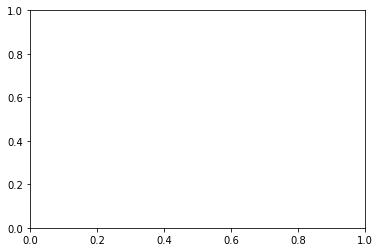

In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt
resultsTest = np.genfromtxt("80_Train.csv",
 delimiter=",")
plt.plot(out_of_sample_y, #training Y value
 out_of_sample_pred, #predicted Y value
 'ro') #red dots
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
from sklearn.metrics import r2_score
testR2 = r2_score(out_of_sample_pred, out_of_sample_y)